<a href="https://colab.research.google.com/github/ankitsharma38/Machine_Learning_LABS/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-1-2086c7d4baed>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set[col] = data_set[col].replace({'Yes': 1, 'No': 0})


Accuracy: 0.7229219143576826
Confusion Matrix:
 [[154  42]
 [ 68 133]]


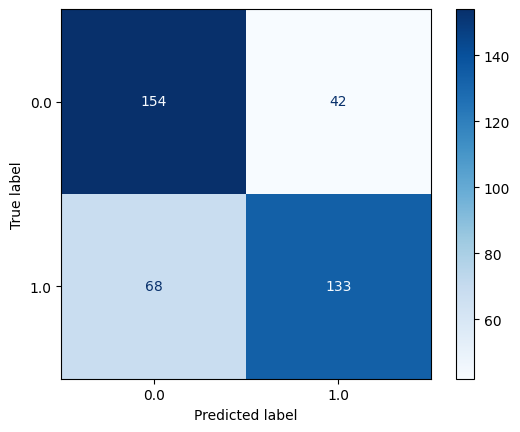

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data_set = pd.read_csv('/content/drive/MyDrive/ML_LAB/data_csv.csv')

# Replace 'Yes' and 'No' with 1 and 0 in relevant columns
binary_columns = [
    'Global developmental delay/intellectual disability',
    'Social/Behavioural Issues',
    'Anxiety_disorder',
    'Jaundice',
    'Family_mem_with_ASD',
    'ASD_traits'
]

for col in binary_columns:
    data_set[col] = data_set[col].replace({'Yes': 1, 'No': 0})

# Drop non-numeric and irrelevant columns
columns_to_drop = [
    "CASE_NO_PATIENT'S",  # Identifier, not useful for training
    'Sex',               # Categorical
    'Ethnicity',         # Categorical
    'Who_completed_the_test'  # Categorical
]
data_set = data_set.drop(columns=columns_to_drop)

# Encode any remaining categorical columns if needed
label_encoder = LabelEncoder()
categorical_columns = data_set.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_set[col] = label_encoder.fit_transform(data_set[col])

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
data_set = pd.DataFrame(imputer.fit_transform(data_set), columns=data_set.columns)

# Separate features and target variable
X = data_set.drop(['ASD_traits'], axis=1)
y = data_set['ASD_traits']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()